# Import packages

In [1]:
import os
import pandas as pd
import ptitprince as pt #Ref: https://github.com/pog87/PtitPrince/blob/master/tutorial_python/raincloud_tutorial_python.ipynb
import matplotlib.pyplot as plt

from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Custom functions

In [2]:
from histogram_data_cleaning import plot_original_vs_filtered
from histogram_data_parameters import csv_files_in_dir,extract_all_parameters_from_csv_files
from histogram_display import display_all_histogram_as_line_plots
from pooled_data_display import remove_outliers_by_group
from statistics_display import stat_output_as_img

# Clean each histogram data
Use IQR method

In [3]:
csv_files_list = csv_files_in_dir('input')
csv_files_list = [csv_file for csv_file in csv_files_list if 'heatmap' in csv_file]
csv_files_list

['input\\Histogram_data\\histogram_data_for_heatmap_GEVAL30_EtOH_maja_18.24.43.csv',
 'input\\Histogram_data\\histogram_data_for_heatmap_GEVAL30_EtOH_maja_18.27.21.csv',
 'input\\Histogram_data\\histogram_data_for_heatmap_GEVAL30_EtOH_maja_18.29.00.csv',
 'input\\Histogram_data\\histogram_data_for_heatmap_GEVAL30_EtOH_maja_18.30.54.csv',
 'input\\Histogram_data\\histogram_data_for_heatmap_GEVAL30_EtOH_maja_18.32.29.csv',
 'input\\Histogram_data\\histogram_data_for_heatmap_GEVAL30_EtOH_maja_18.34.37.csv',
 'input\\Histogram_data\\histogram_data_for_heatmap_GEVAL30_EtOH_maja_18.36.56.csv',
 'input\\Histogram_data\\histogram_data_for_heatmap_GEVAL30_EtOH_maja_18.39.01.csv',
 'input\\Histogram_data\\histogram_data_for_heatmap_GEVAL30_EtOH_maja_18.40.21.csv',
 'input\\Histogram_data\\histogram_data_for_heatmap_GEVAL30_EtOH_maja_18.42.36.csv',
 'input\\Histogram_data\\histogram_data_for_heatmap_GEVAL30_EtOH_old_18.01.08.csv',
 'input\\Histogram_data\\histogram_data_for_heatmap_GEVAL30_EtOH_o

## Clean each histogram data

In [4]:
new_csv_files_list = []
for file in csv_files_list:
    original_df = pd.read_csv(file)

    filtered_original_df = plot_original_vs_filtered(original_df,
                                                     plot_show=False)

    subfolder_name = 'cleaned_histogram'

    # Create the new directory path with the inserted subfolder
    new_directory = os.path.join(os.path.dirname(file), subfolder_name)

    # Create the directory if it doesn't exist
    if not os.path.exists(new_directory):
        os.makedirs(new_directory)

    new_file_path = os.path.join(new_directory, os.path.basename(file))

    new_csv_files_list.append(new_file_path)

    filtered_original_df.to_csv(new_file_path, index=False) #New file will overwrite
    # the original file

In [5]:
new_csv_files_list

['input\\Histogram_data\\cleaned_histogram\\histogram_data_for_heatmap_GEVAL30_EtOH_maja_18.24.43.csv',
 'input\\Histogram_data\\cleaned_histogram\\histogram_data_for_heatmap_GEVAL30_EtOH_maja_18.27.21.csv',
 'input\\Histogram_data\\cleaned_histogram\\histogram_data_for_heatmap_GEVAL30_EtOH_maja_18.29.00.csv',
 'input\\Histogram_data\\cleaned_histogram\\histogram_data_for_heatmap_GEVAL30_EtOH_maja_18.30.54.csv',
 'input\\Histogram_data\\cleaned_histogram\\histogram_data_for_heatmap_GEVAL30_EtOH_maja_18.32.29.csv',
 'input\\Histogram_data\\cleaned_histogram\\histogram_data_for_heatmap_GEVAL30_EtOH_maja_18.34.37.csv',
 'input\\Histogram_data\\cleaned_histogram\\histogram_data_for_heatmap_GEVAL30_EtOH_maja_18.36.56.csv',
 'input\\Histogram_data\\cleaned_histogram\\histogram_data_for_heatmap_GEVAL30_EtOH_maja_18.39.01.csv',
 'input\\Histogram_data\\cleaned_histogram\\histogram_data_for_heatmap_GEVAL30_EtOH_maja_18.40.21.csv',
 'input\\Histogram_data\\cleaned_histogram\\histogram_data_for_h

In [6]:
results_df = extract_all_parameters_from_csv_files(new_csv_files_list)
results_df

meta_data.csv has been saved to output\meta_data.csv. Label the data as you like locally using Excel before import it back for later steps!


,csv_file_name,mean,median,mode
0,C:\Users\louie\Desktop\GitHub\GEVALDataProcess...,0.285420,0.287,0.285
1,C:\Users\louie\Desktop\GitHub\GEVALDataProcess...,0.277775,0.277,0.275
2,C:\Users\louie\Desktop\GitHub\GEVALDataProcess...,0.196769,0.210,0.221
3,C:\Users\louie\Desktop\GitHub\GEVALDataProcess...,0.196464,0.202,0.224
4,C:\Users\louie\Desktop\GitHub\GEVALDataProcess...,0.244993,0.244,0.247
5,C:\Users\louie\Desktop\GitHub\GEVALDataProcess...,0.218853,0.222,0.224
6,C:\Users\louie\Desktop\GitHub\GEVALDataProcess...,0.162567,0.167,0.170
7,C:\Users\louie\Desktop\GitHub\GEVALDataProcess...,0.256230,0.257,0.264
8,C:\Users\louie\Desktop\GitHub\GEVALDataProcess...,0.224770,0.226,0.229
9,C:\Users\louie\Desktop\GitHub\GEVALDataProcess...,0.232434,0.242,0.253


# Display all histograms

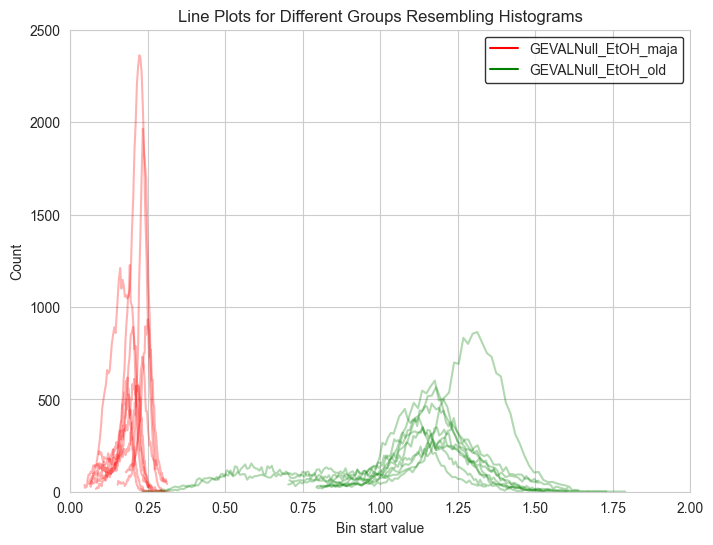

In [12]:
display_all_histogram_as_line_plots(
    new_csv_files_list,
    split_filename_components_list=[
        'GEVALNull_EtOH_maja',
        'GEVALNull_EtOH_old'
    ],
    xlim_min = 0,
    xlim_max = 2,
    ylim_min = 0,
    ylim_max = 2500,
    color_lists=['red', 'green', 'blue', 'orange','purple', 'brown', 'pink', 'gray']
)

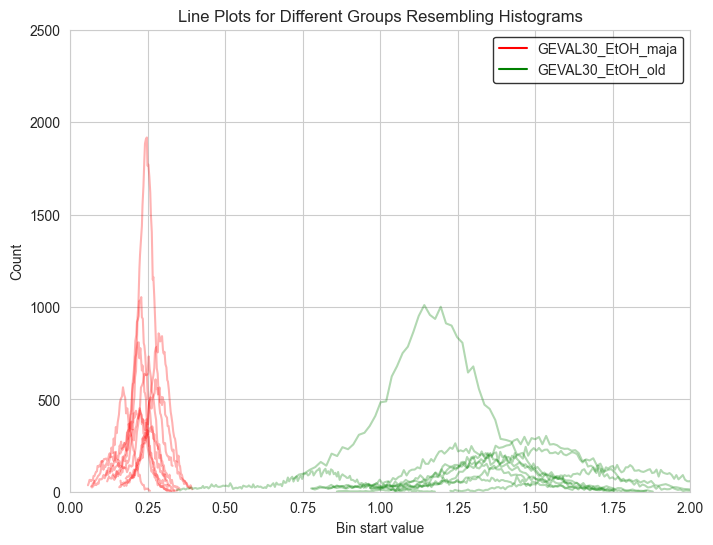

In [11]:
display_all_histogram_as_line_plots(
    new_csv_files_list,
    split_filename_components_list=[
        'GEVAL30_EtOH_maja',
        'GEVAL30_EtOH_old'
    ],
    xlim_min = 0,
    xlim_max = 2,
    ylim_min = 0,
    ylim_max = 2500,
    color_lists=['red', 'green', 'blue', 'orange','purple', 'brown', 'pink', 'gray']
)

# Label extracted meta data
Use Excel to label the meta data csv file

# Read in labeled data

In [3]:
labeled_df = pd.read_csv('input\\meta_data_labeled.csv')
labeled_df

,GEVAL,treatment,image_method,mean,median,mode
0,GEVAL30,EtOH,maja,0.285420,0.287,0.285
1,GEVAL30,EtOH,maja,0.277775,0.277,0.275
2,GEVAL30,EtOH,maja,0.196769,0.210,0.221
3,GEVAL30,EtOH,maja,0.196464,0.202,0.224
4,GEVAL30,EtOH,maja,0.244993,0.244,0.247
5,GEVAL30,EtOH,maja,0.218853,0.222,0.224
6,GEVAL30,EtOH,maja,0.162567,0.167,0.170
7,GEVAL30,EtOH,maja,0.256230,0.257,0.264
8,GEVAL30,EtOH,maja,0.224770,0.226,0.229
9,GEVAL30,EtOH,maja,0.232434,0.242,0.253


# Analyses

## Mean

In [6]:
labeled_df_mean = labeled_df[['GEVAL', 'treatment', 'image_method', 'mean']]
# labeled_df_mean = labeled_df_mean[labeled_df_mean['treatment']!='MPA']
labeled_df_mean

,GEVAL,treatment,image_method,mean
0,GEVAL30,EtOH,maja,0.285420
1,GEVAL30,EtOH,maja,0.277775
2,GEVAL30,EtOH,maja,0.196769
3,GEVAL30,EtOH,maja,0.196464
4,GEVAL30,EtOH,maja,0.244993
5,GEVAL30,EtOH,maja,0.218853
6,GEVAL30,EtOH,maja,0.162567
7,GEVAL30,EtOH,maja,0.256230
8,GEVAL30,EtOH,maja,0.224770
9,GEVAL30,EtOH,maja,0.232434


In [7]:
labeled_df_mean_cleaned = remove_outliers_by_group(labeled_df_mean,
                                                   ['GEVAL', 'treatment',
                                                    'image_method'],
                                                   'mean')
labeled_df_mean_cleaned

,GEVAL,treatment,image_method,mean
0,GEVAL30,EtOH,maja,0.285420
1,GEVAL30,EtOH,maja,0.277775
2,GEVAL30,EtOH,maja,0.196769
3,GEVAL30,EtOH,maja,0.196464
4,GEVAL30,EtOH,maja,0.244993
5,GEVAL30,EtOH,maja,0.218853
6,GEVAL30,EtOH,maja,0.162567
7,GEVAL30,EtOH,maja,0.256230
8,GEVAL30,EtOH,maja,0.224770
9,GEVAL30,EtOH,maja,0.232434


In [20]:
median_values = labeled_df_mean_cleaned.groupby(['GEVAL', 'image_method'])['mean'].median()
median_values

GEVAL      image_method
GEVAL30    maja            0.228602
           old             1.345786
GEVALNull  maja            0.184847
           old             1.167340
Name: mean, dtype: float64

Text(0.5, 1.0, 'Mean values for raw data')

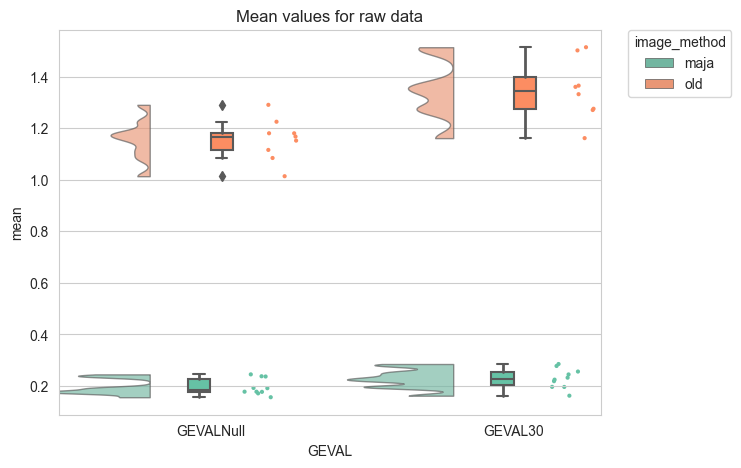

In [8]:
f, ax = plt.subplots(figsize=(7, 5))
ax=pt.RainCloud(
    x = 'GEVAL',
    order=['GEVALNull', 'GEVAL30'],
    y = 'mean',
    hue='image_method',
    hue_order=['maja', 'old'],
    data = labeled_df_mean_cleaned,
    palette ='Set2',
    bw = 0.2,
    width_viol = .7,
    ax = ax,
    orient = 'v',
    move = .2,
    alpha = 0.65,
    dodge=True
)

ax.set_title('Mean values for raw data')

Text(0.5, 1.0, 'Mean values for raw data')

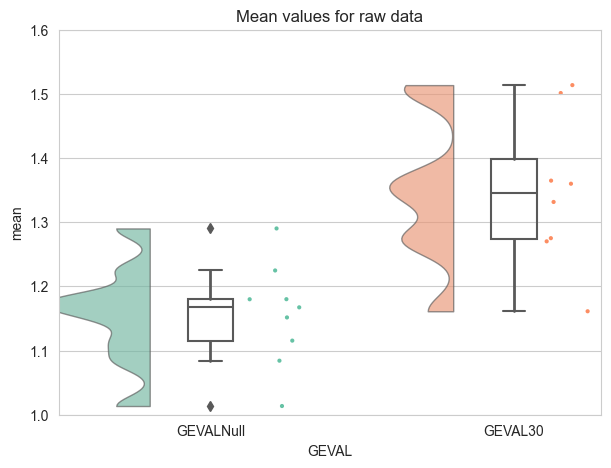

In [15]:
f, ax = plt.subplots(figsize=(7, 5))
ax=pt.RainCloud(
    x = 'GEVAL',
    order=['GEVALNull', 'GEVAL30'],
    y = 'mean',
    data = labeled_df_mean_cleaned[labeled_df_mean_cleaned['image_method'
                                                           '']=='old'],
    palette ='Set2',
    bw = 0.2,
    width_viol = .7,
    ax = ax,
    orient = 'v',
    move = .2,
    alpha = 0.65,
    dodge=True
)

ax.set_ylim(1,1.6)
ax.set_title('Mean values for raw data')

Text(0.5, 1.0, 'Mean values for raw data')

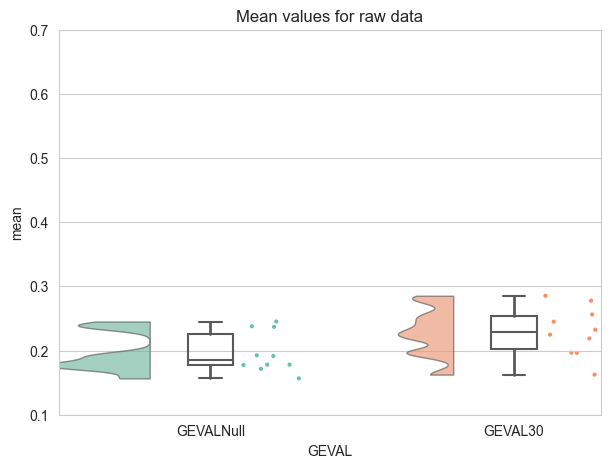

In [13]:
f, ax = plt.subplots(figsize=(7, 5))
ax=pt.RainCloud(
    x = 'GEVAL',
    order=['GEVALNull', 'GEVAL30'],
    y = 'mean',
    data = labeled_df_mean_cleaned[labeled_df_mean_cleaned['image_method'
                                                           '']=='maja'],
    palette ='Set2',
    bw = 0.2,
    width_viol = .7,
    ax = ax,
    orient = 'v',
    move = .2,
    alpha = 0.65,
    dodge=True
)

ax.set_ylim(0.1,0.7)
ax.set_title('Mean values for raw data')

## Statistics

                            sum_sq    df            F        PR(>F)
C(GEVAL)                  0.102595   1.0    19.768471  9.334961e-05
C(image_method)           9.857369   1.0  1899.360788  9.504800e-31
C(GEVAL):C(image_method)  0.057153   1.0    11.012492  2.213552e-03
Residual                  0.171265  33.0          NaN           NaN


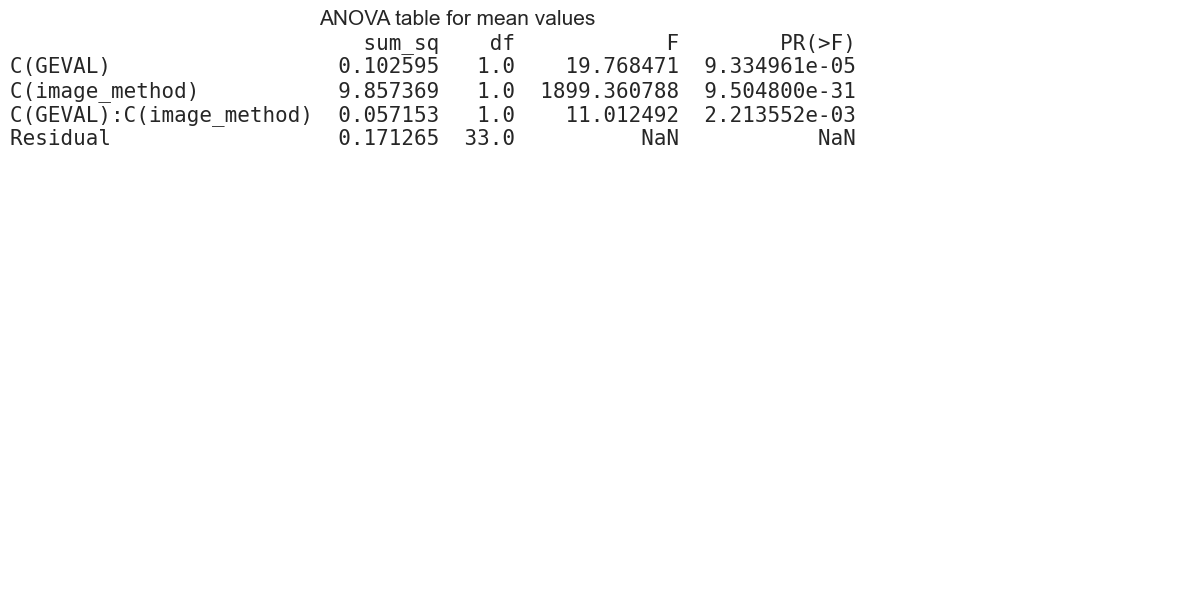

In [16]:
formula = 'mean ~ C(GEVAL) + C(image_method) + C(GEVAL):C' \
          '(image_method)'
model = ols(formula, data=labeled_df_mean_cleaned).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA table
print(anova_table)

stat_output_as_img(anova_table, 'ANOVA table for mean values')

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1         group2     meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------
  GEVAL30_maja    GEVAL30_old   1.1176    0.0  1.0252    1.21   True
  GEVAL30_maja GEVALNull_maja   -0.033 0.7366 -0.1201  0.0541  False
  GEVAL30_maja  GEVALNull_old   0.9267    0.0  0.8372  1.0163   True
   GEVAL30_old GEVALNull_maja  -1.1506    0.0  -1.243 -1.0582   True
   GEVAL30_old  GEVALNull_old  -0.1909    0.0 -0.2856 -0.0962   True
GEVALNull_maja  GEVALNull_old   0.9597    0.0  0.8702  1.0493   True
--------------------------------------------------------------------


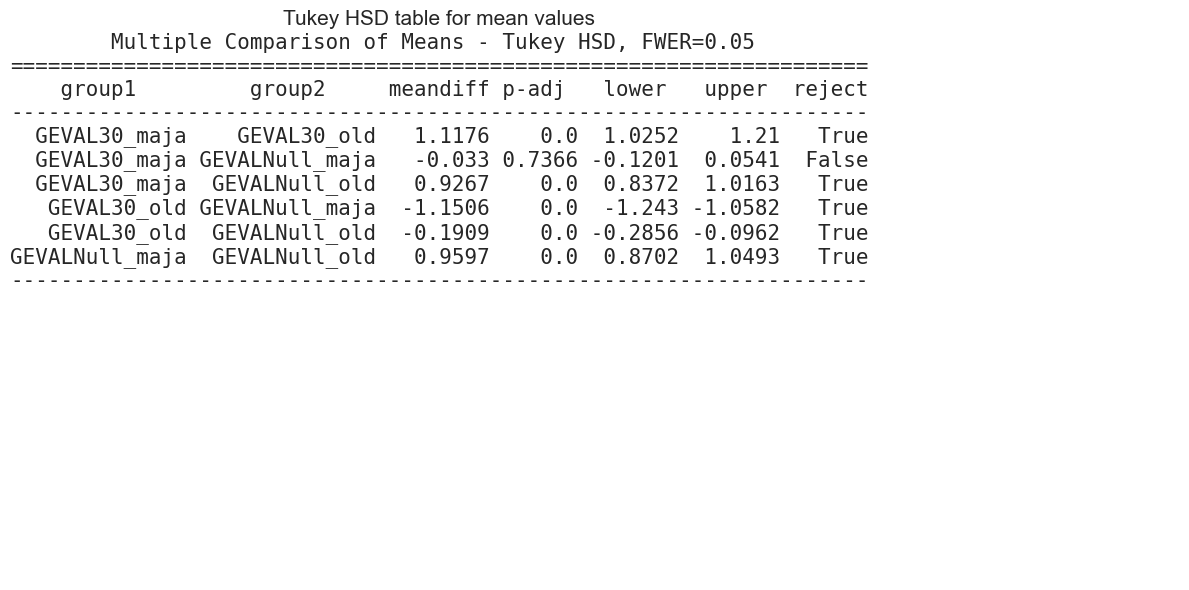

In [17]:
# Perform Tukey's HSD test for the interaction effect
interaction_group = labeled_df_mean_cleaned["GEVAL"] + '_' + \
                    labeled_df_mean_cleaned["image_method"]
tukey_interaction = pairwise_tukeyhsd(endog=labeled_df_mean_cleaned['mean'], groups=interaction_group, alpha=0.05)

# Display the Tukey HSD results
print(tukey_interaction)

stat_output_as_img(tukey_interaction, 'Tukey HSD table for mean values')